In [3]:
import cv2
from matplotlib import pyplot as plt

(567, 567)


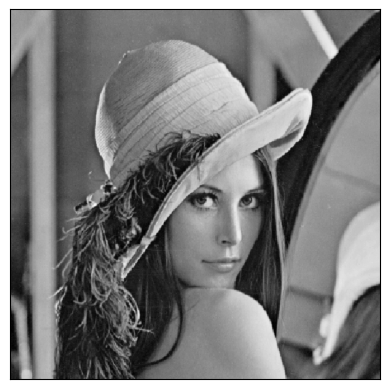

In [28]:
image = cv2.imread("./lena.png")
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
image = image / 255.0
print(image.shape)
plt.figure()
plt.tick_params(axis="both", which="both", bottom=False, labelbottom=False, left=False, labelleft=False)
plt.imshow(image, cmap="gray")

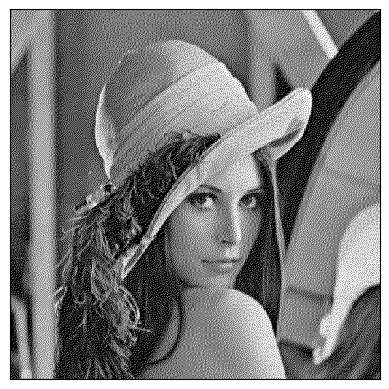

In [36]:
def alg1(image):
    rows, cols = image.shape
    new_image = image.copy()
    for y in range(rows):
        for x in range(cols):
            old_pixel = new_image[y, x]
            new_pixel = 0.0 if old_pixel < 0.5 else 1.0
            new_image[y, x] = new_pixel

            error = old_pixel - new_pixel

            
            if x < cols - 1:
                new_image[y, x + 1] += error * 7.0 / 16.0

            if y < rows - 1:
                if x > 0:
                    new_image[y + 1, x - 1] += error * 3.0 / 16.0

                new_image[y + 1, x] += error * 5.0 / 16.0

                if x < cols - 1:
                    new_image[y + 1, x + 1] += error * 1.0 / 16.0

    return new_image

alg1_image = alg1(image)

plt.figure()
plt.tick_params(axis="both", which="both", bottom=False, labelbottom=False, left=False, labelleft=False)
plt.imshow(alg1_image, cmap="gray", vmin=0.0, vmax=1.0)

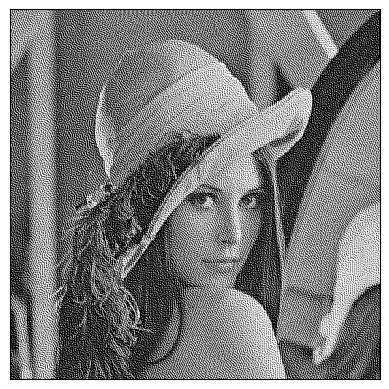

In [37]:
def alg2(image):
    rows, cols = image.shape
    new_image = image.copy()
    for y in range(rows):
        for x in range(cols):
            old_pixel = new_image[y, x]
            new_pixel = 0.0 if old_pixel < 0.5 else 1.0
            new_image[y, x] = new_pixel

            error = old_pixel - new_pixel

            
            if x < cols - 1:
                new_image[y, x + 1] += error * 7.0 / 48.0

            if x < cols - 2:
                new_image[y, x + 2] += error * 5.0 / 48.0

            if y < rows - 1:
                if x > 1:
                    new_image[y + 1, x - 2] += error * 3.0 / 48.0
                    
                if x > 0:
                    new_image[y + 1, x - 1] += error * 5.0 / 16.0

                new_image[y + 1, x] += error * 7.0 / 48.0

                if x < cols - 1:
                    new_image[y + 1, x + 1] += error * 5.0 / 48.0

                if x < cols - 2:
                    new_image[y + 1, x + 2] += error * 3.0 / 48.0

            if y < rows - 2:
                if x > 1:
                    new_image[y + 2, x - 2] += error * 1.0 / 48.0
                    
                if x > 0:
                    new_image[y + 2, x - 1] += error * 3.0 / 16.0

                new_image[y + 2, x] += error * 5.0 / 48.0

                if x < cols - 1:
                    new_image[y + 2, x + 1] += error * 3.0 / 48.0

                if x < cols - 2:
                    new_image[y + 2, x + 2] += error * 1.0 / 48.0

    return new_image

alg2_image = alg2(image)

plt.figure()
plt.tick_params(axis="both", which="both", bottom=False, labelbottom=False, left=False, labelleft=False)
plt.imshow(alg2_image, cmap="gray", vmin=0.0, vmax=1.0)

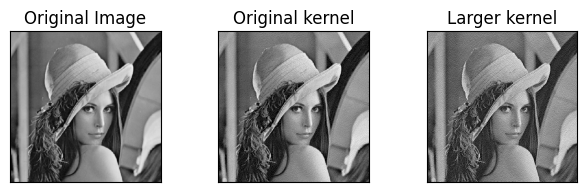

In [40]:
plt.subplots(1, 3)
plt.tight_layout()

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.tick_params(axis="both", which="both", bottom=False, labelbottom=False, left=False, labelleft=False)
plt.imshow(image, cmap="gray", vmin=0.0, vmax=1.0)

plt.subplot(1, 3, 2)
plt.title("Original kernel")
plt.tick_params(axis="both", which="both", bottom=False, labelbottom=False, left=False, labelleft=False)
plt.imshow(alg1_image, cmap="gray", vmin=0.0, vmax=1.0)

plt.subplot(1, 3, 3)
plt.title("Larger kernel")
plt.tick_params(axis="both", which="both", bottom=False, labelbottom=False, left=False, labelleft=False)
plt.imshow(alg2_image, cmap="gray", vmin=0.0, vmax=1.0)

plt.savefig("q2.png", bbox_inches="tight")